/var/folders/lp/l5v0z5894r912dc6qp90m2j00000gn/T/ipykernel_8989/363266944.py:12: DtypeWarning: Columns (12,17) have mixed types. Specify dtype option on import or set low_memory=False.
  trainingdata = pd.read_csv('/Users/dltc2020/Documents/Senior-project/AutoCombine.csv')


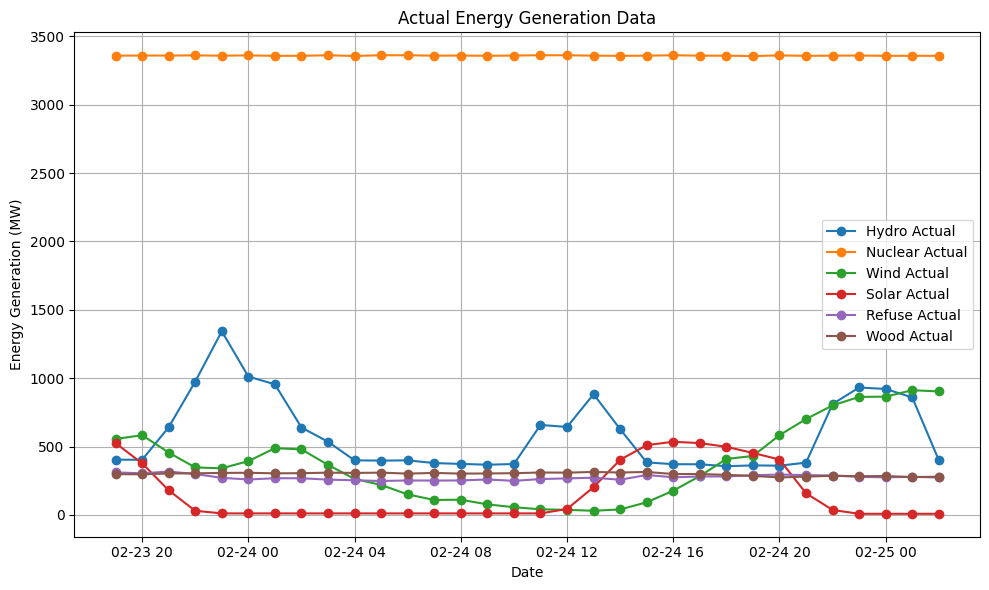

Mean Absolute Error for each energy type:
HydroAbsoluteError      329.962674
NuclearAbsoluteError     17.305928
WindAbsoluteError       333.346248
SolarAbsoluteError      108.448276
RefuseAbsoluteError      30.265792
WoodAbsoluteError        14.418692
dtype: float64

Average Percent Error for each energy type:
HydroPercentError       55.528419
NuclearPercentError      0.515114
WindPercentError       357.183876
SolarPercentError       84.258406
RefusePercentError      11.357718
WoodPercentError         4.820446
dtype: float64

Total Average Percent Error across all energy types:
5.260249543688843


In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from bisect import bisect_left
# Function to find the closest date in the real data for each date in the predictions
def find_closest_date(pred_date, real_dates):
    return real_dates.iloc[(real_dates - pred_date).abs().argsort()[:1]].iloc[0]

# Initialize an empty list to store results
results = []

trainingdata = pd.read_csv('/Users/dltc2020/Documents/Senior-project/AutoCombine.csv')
trainingdata['BeginDate'] = pd.to_datetime(trainingdata['BeginDate']).dt.tz_localize(None)
output_df = pd.read_csv('/Users/dltc2020/Documents/Senior-project/energy_predictions_2025-02-24.csv')
output_df['BeginDate'] = pd.to_datetime(output_df['BeginDate']).dt.tz_localize(None)

# Loop over each prediction row
for _, pred_row in output_df.iterrows():
    # Find the closest date in real data
    closest_date = find_closest_date(pred_row['BeginDate'], trainingdata['BeginDate'])
    
    # Get the row with the closest date in the real data
    real_row = trainingdata[trainingdata['BeginDate'] == closest_date].iloc[0]
    
    # Store the predicted and actual values for each energy type
    comparison = {
        'Date': pred_row['BeginDate'],
        'HydroPrediction': pred_row['HydroPredictions'],
        'HydroActual': real_row['Hydro'],
        'NuclearPrediction': pred_row['NuclearPredictions'],
        'NuclearActual': real_row['Nuclear'],
        'WindPrediction': pred_row['WindPredictions'],
        'WindActual': real_row['Wind'],
        'SolarPrediction': pred_row['SolarPredictions'],
        'SolarActual': real_row['Solar'],
        'RefusePrediction': pred_row['RefusePredictions'],
        'RefuseActual': real_row['Refuse'],
        'WoodPrediction': pred_row['WoodPredictions'],
        'WoodActual': real_row['Wood']
    }
    results.append(comparison)

# Convert results to a DataFrame
# Convert results to a DataFrame
# Convert results to a DataFrame
comparison_df = pd.DataFrame(results)

# Plot only the actual data
plt.figure(figsize=(10, 6))
plt.plot(comparison_df['Date'], comparison_df['HydroActual'], label='Hydro Actual', marker='o')
plt.plot(comparison_df['Date'], comparison_df['NuclearActual'], label='Nuclear Actual', marker='o')
plt.plot(comparison_df['Date'], comparison_df['WindActual'], label='Wind Actual', marker='o')
plt.plot(comparison_df['Date'], comparison_df['SolarActual'], label='Solar Actual', marker='o')
plt.plot(comparison_df['Date'], comparison_df['RefuseActual'], label='Refuse Actual', marker='o')
plt.plot(comparison_df['Date'], comparison_df['WoodActual'], label='Wood Actual', marker='o')

# Add labels and legend
plt.title('Actual Energy Generation Data')
plt.xlabel('Date')
plt.ylabel('Energy Generation (MW)')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()
# Drop rows with NaN values, or alternatively, fill NaNs with 0
# Uncomment the following line if you prefer to fill NaNs instead of dropping them
# comparison_df = comparison_df.fillna(0)

import pandas as pd
import numpy as np

# Convert results to a DataFrame
comparison_df = pd.DataFrame(results)

# Drop rows with NaN values, or alternatively, fill NaNs with 0
# Uncomment the following line if you prefer to fill NaNs instead of dropping them
# comparison_df = comparison_df.fillna(0)

# Drop rows with NaN values (if you prefer to drop them)
comparison_df = comparison_df.dropna()

# Calculate the absolute error for each row and each energy type
comparison_df['HydroAbsoluteError'] = abs(comparison_df['HydroPrediction'] - comparison_df['HydroActual'])
comparison_df['NuclearAbsoluteError'] = abs(comparison_df['NuclearPrediction'] - comparison_df['NuclearActual'])
comparison_df['WindAbsoluteError'] = abs(comparison_df['WindPrediction'] - comparison_df['WindActual'])
comparison_df['SolarAbsoluteError'] = abs(comparison_df['SolarPrediction'] - comparison_df['SolarActual'])
comparison_df['RefuseAbsoluteError'] = abs(comparison_df['RefusePrediction'] - comparison_df['RefuseActual'])
comparison_df['WoodAbsoluteError'] = abs(comparison_df['WoodPrediction'] - comparison_df['WoodActual'])

# Calculate the percent error for each row and each energy type
comparison_df['HydroPercentError'] = np.where(comparison_df['HydroActual'] != 0,
                                              abs((comparison_df['HydroPrediction'] - comparison_df['HydroActual']) / comparison_df['HydroActual']) * 100,
                                              np.nan)
comparison_df['NuclearPercentError'] = np.where(comparison_df['NuclearActual'] != 0,
                                                abs((comparison_df['NuclearPrediction'] - comparison_df['NuclearActual']) / comparison_df['NuclearActual']) * 100,
                                                np.nan)
comparison_df['WindPercentError'] = np.where(comparison_df['WindActual'] != 0,
                                             abs((comparison_df['WindPrediction'] - comparison_df['WindActual']) / comparison_df['WindActual']) * 100,
                                             np.nan)
comparison_df['SolarPercentError'] = np.where(comparison_df['SolarActual'] != 0,
                                              abs((comparison_df['SolarPrediction'] - comparison_df['SolarActual']) / comparison_df['SolarActual']) * 100,
                                              np.nan)
comparison_df['RefusePercentError'] = np.where(comparison_df['RefuseActual'] != 0,
                                               abs((comparison_df['RefusePrediction'] - comparison_df['RefuseActual']) / comparison_df['RefuseActual']) * 100,
                                               np.nan)
comparison_df['WoodPercentError'] = np.where(comparison_df['WoodActual'] != 0,
                                             abs((comparison_df['WoodPrediction'] - comparison_df['WoodActual']) / comparison_df['WoodActual']) * 100,
                                             np.nan)

# Calculate the mean absolute error for each energy type
mean_absolute_errors = comparison_df[['HydroAbsoluteError', 'NuclearAbsoluteError', 'WindAbsoluteError', 
                                      'SolarAbsoluteError', 'RefuseAbsoluteError', 'WoodAbsoluteError']].mean()

# Calculate the average percent error for each energy type by averaging row-by-row percent errors
avg_percent_errors = comparison_df[['HydroPercentError', 'NuclearPercentError', 'WindPercentError', 
                                    'SolarPercentError', 'RefusePercentError', 'WoodPercentError']].mean()

# Calculate the total average percent error across all energy types as a single measurement
total_avg_percent_error = (
    abs(
        comparison_df[['HydroPrediction', 'NuclearPrediction', 'WindPrediction', 'SolarPrediction', 'RefusePrediction', 'WoodPrediction']].sum().sum() -
        comparison_df[['HydroActual', 'NuclearActual', 'WindActual', 'SolarActual', 'RefuseActual', 'WoodActual']].sum().sum()
    )
    / comparison_df[['HydroActual', 'NuclearActual', 'WindActual', 'SolarActual', 'RefuseActual', 'WoodActual']].sum().sum()
) * 100

print("Mean Absolute Error for each energy type:")
print(mean_absolute_errors)
print("\nAverage Percent Error for each energy type:")
print(avg_percent_errors)
print("\nTotal Average Percent Error across all energy types:")
print(total_avg_percent_error)
